# Phase 0 : Filtrage des donn√©es DVF


In [2]:
import numpy as np

In [3]:
import pandas as pd
import os

# Chargement
df = pd.read_csv("../raw_data/ValeursFoncieres-2022.txt", sep='|', low_memory=False)

# Harmonisation
df['Commune'] = df['Commune'].str.upper()

# Filtrage LILLE
df_lille = df[
    (df['Commune'] == 'LILLE') &
    (df['Nature mutation'] == 'Vente') &
    (df['Surface reelle bati'].notna()) &
    (df['Valeur fonciere'].notna())
].copy()

# Filtrage BORDEAUX
df_bordeaux = df[
    (df['Commune'] == 'BORDEAUX') &
    (df['Nature mutation'] == 'Vente') &
    (df['Surface reelle bati'].notna()) &
    (df['Valeur fonciere'].notna())
].copy()

# Conversion en float
for df_city in [df_lille, df_bordeaux]:
    df_city['Valeur fonciere'] = df_city['Valeur fonciere'].astype(str).str.replace(',', '.').str.replace(' ', '').astype(float)
    df_city['Surface reelle bati'] = df_city['Surface reelle bati'].astype(str).str.replace(',', '.').str.replace(' ', '').astype(float)

# Calcul du prix au m¬≤
df_lille['prix_m2'] = df_lille['Valeur fonciere'] / df_lille['Surface reelle bati']
df_bordeaux['prix_m2'] = df_bordeaux['Valeur fonciere'] / df_bordeaux['Surface reelle bati']

# Export
os.makedirs("../data", exist_ok=True)
df_lille.to_csv("../data/lille_2022.csv", index=False)
df_bordeaux.to_csv("../data/bordeaux_2022.csv", index=False)

print("Export termin√©.")

Export termin√©.


# Phase 1 ‚Äî Mod√©lisation du prix au m¬≤ √† Lille (2022) pour les logements de 4 pi√®ces

In [4]:
df_lille = pd.read_csv("../data/lille_2022.csv")

In [5]:
df_lille.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11354 entries, 0 to 11353
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identifiant de document     0 non-null      float64
 1   Reference document          0 non-null      float64
 2   1 Articles CGI              0 non-null      float64
 3   2 Articles CGI              0 non-null      float64
 4   3 Articles CGI              0 non-null      float64
 5   4 Articles CGI              0 non-null      float64
 6   5 Articles CGI              0 non-null      float64
 7   No disposition              11354 non-null  int64  
 8   Date mutation               11354 non-null  object 
 9   Nature mutation             11354 non-null  object 
 10  Valeur fonciere             11354 non-null  float64
 11  No voie                     11248 non-null  float64
 12  B/T/Q                       652 non-null    object 
 13  Type de voie                113

In [6]:
df_lille.columns

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain', 'prix_m2'],
      dtype='object')

In [7]:
df_lille.describe()

c:\Users\User\Desktop\fast-api-ml-immobilier-project\venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\User\Desktop\fast-api-ml-immobilier-project\venv\lib\site-packages\numpy\lib\_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Identifiant de document  Reference document  1 Articles CGI  \
count                      0.0                 0.0             0.0   
mean                       NaN                 NaN             NaN   
std                        NaN                 NaN             NaN   
min                        NaN                 NaN             NaN   
25%                        NaN                 NaN             NaN   
50%                        NaN                 NaN             NaN   
75%                        NaN                 NaN             NaN   
max                        NaN                 NaN             NaN   

       2 Articles CGI  3 Articles CGI  4 Articles CGI  5 Articles CGI  \
count             0.0             0.0             0.0             0.0   
mean              NaN             NaN             NaN             NaN   
std               NaN             NaN             NaN             NaN   
min               NaN             NaN             NaN             NaN   
25%               NaN             NaN             NaN             NaN   
50%               NaN             NaN             NaN             NaN   
75%               NaN             NaN             NaN             NaN   
max               NaN             NaN             NaN             NaN   

       No disposition  Valeur fonciere       No voie  ...     4eme lot  \
count    11354.000000     1.135400e+04  11248.000000  ...   106.000000   
mean         1.003963     6.906027e+05    199.709015  ...    84.905660   
std          0.062833     2.354745e+06   1072.930117  ...   373.543662   
min          1.000000     1.000000e+00      1.000000  ...     3.000000   
25%          1.000000     1.545000e+05     13.000000  ...     7.000000   
50%          1.000000     2.275175e+05     35.000000  ...     9.000000   
75%          1.000000     3.651500e+05     91.000000  ...    31.000000   
max          2.000000     6.180000e+07   9999.000000  ...  3004.000000   

          5eme lot  Nombre de lots  Code type local  Identifiant local  \
count    50.000000    11354.000000     11354.000000                0.0   
mean     94.180000        0.957812         2.472521                NaN   
std     346.065388        0.899357         0.789471                NaN   
min       7.000000        0.000000         1.000000                NaN   
25%       9.000000        0.000000         2.000000                NaN   
50%      19.000000        1.000000         2.000000                NaN   
75%      32.000000        1.000000         3.000000                NaN   
max    2256.000000       17.000000         4.000000                NaN   

       Surface reelle bati  Nombre pieces principales  \
count         11354.000000               11354.000000   
mean             42.131760                   1.323146   
std             175.379622                   1.666542   
min               0.000000                   0.000000   
25%               0.000000                   0.000000   
50%              22.000000                   1.000000   
75%              59.000000                   2.000000   
max           10945.000000                  14.000000   

       Nature culture speciale  Surface terrain       prix_m2  
count                      0.0      3672.000000  1.135400e+04  
mean                       NaN       236.449619           inf  
std                        NaN       629.515964           NaN  
min                        NaN         4.000000  1.347709e-04  
25%                        NaN        78.000000  3.851514e+03  
50%                        NaN       124.000000  1.685750e+04  
75%                        NaN       221.000000           NaN  
max                        NaN     18147.000000           inf  

[8 rows x 29 columns]

In [8]:
df_lille.describe(exclude= np.number)

Date mutation Nature mutation B/T/Q Type de voie Code voie    Voie  \
count          11354           11354   652        11328     11354   11354   
unique           274               1    12           22      1041    1022   
top       11/08/2022           Vente     B          RUE      0657  BAYARD   
freq             213           11354   475         9337       273     273   

       Commune Section Surface Carrez du 1er lot Surface Carrez du 2eme lot  \
count    11354   11354                      2442                        613   
unique       1     191                      1583                        296   
top      LILLE       C                    319,20                     326,40   
freq     11354     481                        11                         11   

       Surface Carrez du 3eme lot Surface Carrez du 4eme lot  \
count                          75                         19   
unique                         30                          6   
top                        328,50                     326,80   
freq                           11                         11   

       Surface Carrez du 5eme lot  Type local Nature culture  
count                          16       11354           3672  
unique                          4           4              4  
top                        273,50  D√©pendance              S  
freq                           11        4641           3467

In [9]:
df_lille['Nombre pieces principales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11354 entries, 0 to 11353
Series name: Nombre pieces principales
Non-Null Count  Dtype  
--------------  -----  
11354 non-null  float64
dtypes: float64(1)
memory usage: 88.8 KB


In [10]:
df_lille['Nombre pieces principales'].astype('int')

0        5
1        3
2        0
3        0
4        0
        ..
11349    0
11350    0
11351    4
11352    4
11353    4
Name: Nombre pieces principales, Length: 11354, dtype: int64

## Appart & maison de 4 pieces

In [11]:
df_lille_filtered = df_lille[df_lille['Nombre pieces principales'] == 4]

In [12]:
df_lille_filtered['Type local'].unique()

array(['Maison', 'Appartement'], dtype=object)

In [13]:
df_maison = df_lille_filtered[df_lille_filtered['Type local'] == 'Maison']

In [14]:
df_appart = df_lille_filtered[df_lille_filtered['Type local'] == 'Appartement']

## 4.

In [15]:
required_columns = ['Surface reelle bati', 'Nombre pieces principales',
'Type local','Surface terrain','Nombre de lots','prix_m2']

In [16]:
df_maison_ = df_maison[required_columns]

In [17]:
df_maison_.shape

(354, 6)

In [18]:
df_maison_.describe(exclude=np.number)

Type local
count         354
unique          1
top        Maison
freq          354

In [19]:
df_maison_.describe()

Surface reelle bati  Nombre pieces principales  Surface terrain  \
count           354.000000                      354.0       340.000000   
mean             84.310734                        4.0       142.638235   
std              19.462888                        0.0        84.800103   
min              44.000000                        4.0        31.000000   
25%              71.000000                        4.0        84.750000   
50%              80.500000                        4.0       127.000000   
75%              95.000000                        4.0       175.250000   
max             165.000000                        4.0       607.000000   

       Nombre de lots      prix_m2  
count      354.000000   354.000000  
mean         0.039548  3003.594635  
std          0.195171  1116.900260  
min          0.000000   144.144144  
25%          0.000000  2291.390977  
50%          0.000000  2847.948718  
75%          0.000000  3481.995492  
max          1.000000  9192.073171

In [20]:
df_appart_ = df_appart[required_columns]

In [21]:
df_appart_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 23 to 11351
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Surface reelle bati        435 non-null    float64
 1   Nombre pieces principales  435 non-null    float64
 2   Type local                 435 non-null    object 
 3   Surface terrain            49 non-null     float64
 4   Nombre de lots             435 non-null    int64  
 5   prix_m2                    435 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 23.8+ KB


## 6. **Nettoyer les donn√©es**¬†:
    - Supprimer les lignes avec valeurs manquantes sur les colonnes utilis√©es
    - Identifier et retirer les valeurs aberrantes (prix au m¬≤ trop faible ou trop √©lev√©)

In [22]:
df_maison_.isna().any(axis=0)

Surface reelle bati          False
Nombre pieces principales    False
Type local                   False
Surface terrain               True
Nombre de lots               False
prix_m2                      False
dtype: bool

In [23]:
df_maison_.dropna(axis=0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_10000\2148659308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maison_.dropna(axis=0, inplace=True)


In [24]:
df_maison_.shape

(340, 6)

In [25]:
df_appart_.isna().any(axis=0)

Surface reelle bati          False
Nombre pieces principales    False
Type local                   False
Surface terrain               True
Nombre de lots               False
prix_m2                      False
dtype: bool

In [26]:
df_appart_.dropna(axis=0,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_10000\1012287777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_appart_.dropna(axis=0,inplace=True)


In [27]:
df_appart_.shape

(49, 6)

## Outliers

In [28]:
def drop_outliers(df:pd.DataFrame, column:str):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR=q3-q1

    without_outliers = df[((df[column]>(q1-1.5*IQR)) & (df[column]<(q3+1.5*IQR)))]
    return without_outliers
    


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

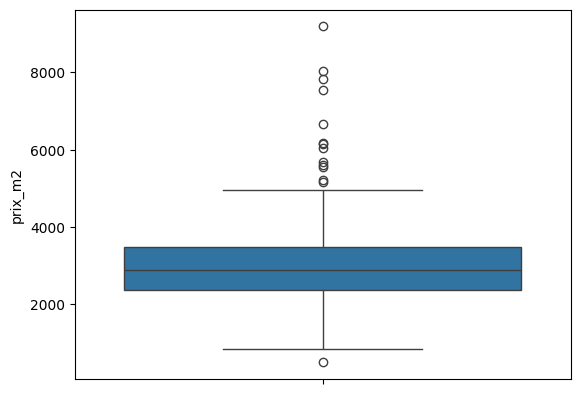

In [30]:
sns.boxplot(df_maison_['prix_m2'])
plt.show()

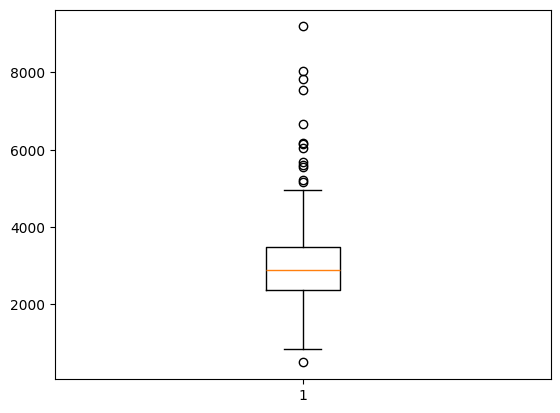

In [31]:
plt.boxplot(df_maison_['prix_m2'])
plt.show()

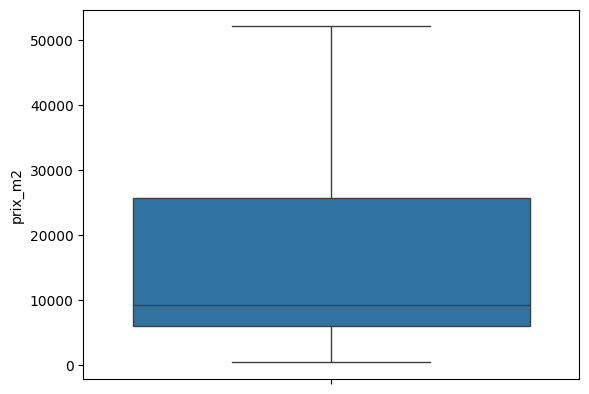

In [32]:
sns.boxplot(df_appart_['prix_m2'])
plt.show()

In [33]:
df_maison_to_process = drop_outliers(df_maison_, 'prix_m2')
df_maison_to_process.head()

Surface reelle bati  Nombre pieces principales Type local  \
18                 165.0                        4.0     Maison   
65                  64.0                        4.0     Maison   
161                 70.0                        4.0     Maison   
168                 62.0                        4.0     Maison   
176                 72.0                        4.0     Maison   

     Surface terrain  Nombre de lots      prix_m2  
18             121.0               0  1848.484848  
65             127.0               0  3545.312500  
161            192.0               0  2941.285714  
168             96.0               0  2572.580645  
176            135.0               0  3609.722222

In [34]:
df_appart_to_process = drop_outliers(df_appart_, 'prix_m2')
df_appart_to_process.head()

Surface reelle bati  Nombre pieces principales   Type local  \
394                 116.0                        4.0  Appartement   
575                 170.0                        4.0  Appartement   
940                  53.0                        4.0  Appartement   
1249                 65.0                        4.0  Appartement   
1251                 65.0                        4.0  Appartement   

      Surface terrain  Nombre de lots       prix_m2  
394             155.0               0   1465.517241  
575             221.0               0   3058.823529  
940             105.0               0  27735.849057  
1249            176.0               0   9230.769231  
1251            176.0               0   9230.769231

### Appart

In [35]:
df_appart_num_fea = df_appart_to_process.drop('Type local', axis=1)

In [36]:
df_appart_num_fea.describe()

Surface reelle bati  Nombre pieces principales  Surface terrain  \
count            49.000000                       49.0        49.000000   
mean             85.204082                        4.0       232.714286   
std              26.742584                        0.0       193.109533   
min              18.000000                        4.0        43.000000   
25%              72.000000                        4.0       136.000000   
50%              84.000000                        4.0       176.000000   
75%              94.000000                        4.0       306.000000   
max             170.000000                        4.0      1207.000000   

       Nombre de lots       prix_m2  
count            49.0     49.000000  
mean              0.0  17667.561781  
std               0.0  15911.591246  
min               0.0    416.666667  
25%               0.0   6000.000000  
50%               0.0   9230.769231  
75%               0.0  25654.761905  
max               0.0  52065.934066

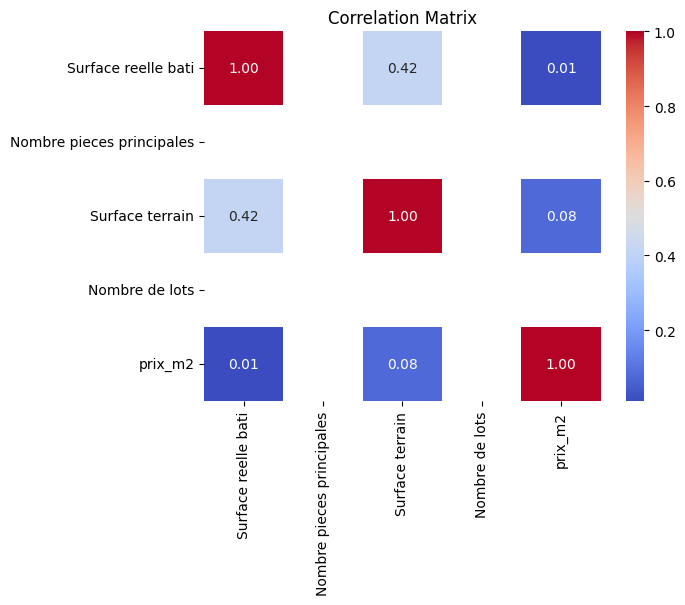

In [37]:
sns.heatmap(df_appart_num_fea.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

array([[<Axes: title={'center': 'Surface reelle bati'}>,
        <Axes: title={'center': 'Nombre pieces principales'}>],
       [<Axes: title={'center': 'Surface terrain'}>,
        <Axes: title={'center': 'Nombre de lots'}>],
       [<Axes: title={'center': 'prix_m2'}>, <Axes: >]], dtype=object)

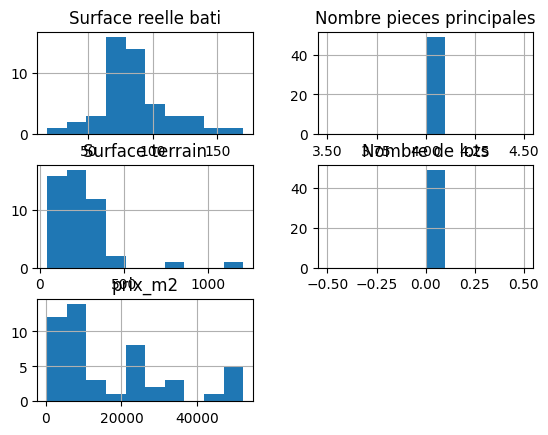

In [38]:
df_appart_num_fea.hist()

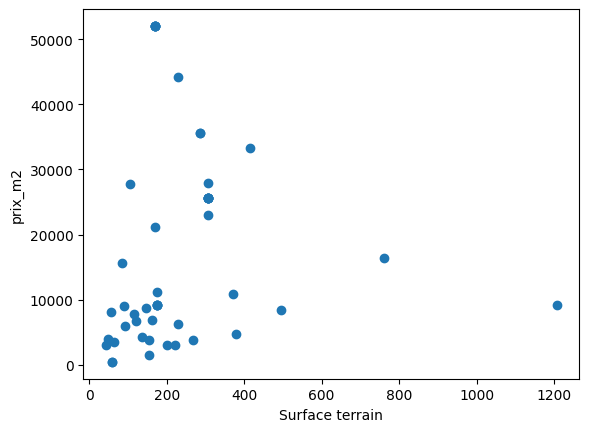

In [39]:
plt.scatter(df_appart_num_fea['Surface terrain'],df_appart_num_fea['prix_m2'])
plt.xlabel('Surface terrain')
plt.ylabel('prix_m2')
plt.show()

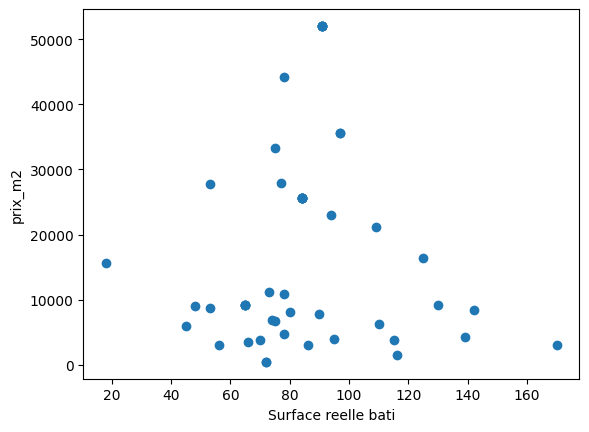

In [40]:
plt.scatter(df_appart_num_fea['Surface reelle bati'],df_appart_num_fea['prix_m2'])
plt.xlabel('Surface reelle bati')
plt.ylabel('prix_m2')
plt.show()

### Maison

In [41]:
df_maison_num_fea = df_maison_to_process.drop('Type local', axis=1)

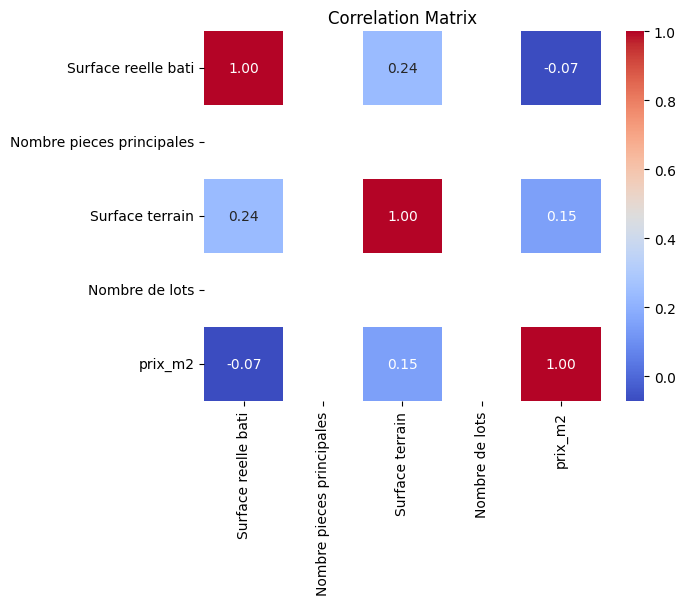

In [42]:
sns.heatmap(df_maison_num_fea.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [43]:
#df_numeric = df_maison_to_process.select_dtypes(include='number')

array([[<Axes: title={'center': 'Surface reelle bati'}>,
        <Axes: title={'center': 'Nombre pieces principales'}>],
       [<Axes: title={'center': 'Surface terrain'}>,
        <Axes: title={'center': 'Nombre de lots'}>],
       [<Axes: title={'center': 'prix_m2'}>, <Axes: >]], dtype=object)

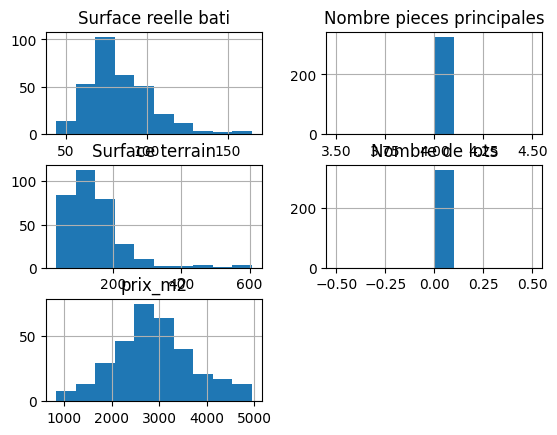

In [44]:
df_maison_num_fea.hist()

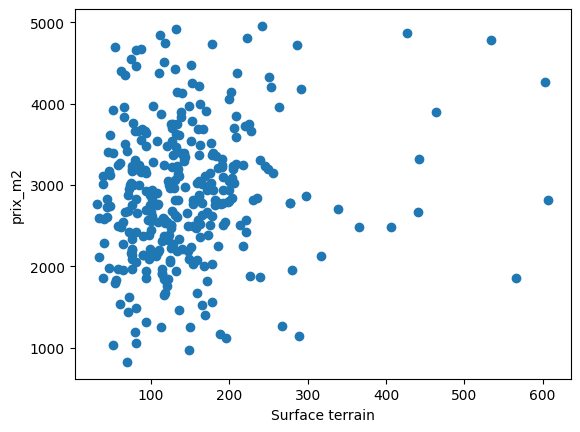

In [45]:
plt.scatter(df_maison_num_fea['Surface terrain'],df_maison_num_fea['prix_m2'])
plt.xlabel('Surface terrain')
plt.ylabel('prix_m2')
plt.show()

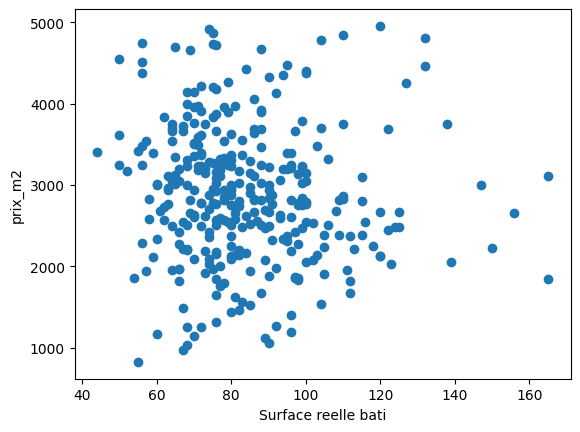

In [46]:
plt.scatter(df_maison_num_fea['Surface reelle bati'],df_maison_num_fea['prix_m2'])
plt.xlabel('Surface reelle bati')
plt.ylabel('prix_m2')
plt.show()

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
from sklearn.preprocessing import StandardScaler

## 7.

### Appart

In [49]:
# X, y calculation
X_appart = df_appart_to_process.drop(columns=['Type local','prix_m2'], axis = 1)
y_appart = df_appart_to_process[['prix_m2']]

In [50]:
X_appart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 394 to 10447
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Surface reelle bati        49 non-null     float64
 1   Nombre pieces principales  49 non-null     float64
 2   Surface terrain            49 non-null     float64
 3   Nombre de lots             49 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 1.9 KB


In [51]:
X_appart.shape

(49, 4)

In [52]:
# Splitting train & test data
Xa_train,  Xa_test, ya_train, ya_test = train_test_split(X_appart,y_appart,test_size = 0.2, random_state=42)

In [53]:
# Standardization
ScalerXa = StandardScaler()
Scalerya = StandardScaler()

In [54]:
# train data
Xa_train_scaled = ScalerXa.fit_transform(Xa_train)
ya_train_scaled = Scalerya.fit_transform(ya_train)

# test data
Xa_test_scaled = ScalerXa.transform(Xa_test)
ya_test_scaled = Scalerya.transform(ya_test)

### Maison

In [55]:
X_maison = df_maison_to_process.drop(columns=['Type local','prix_m2'], axis = 1)
y_maison = df_maison_to_process[['prix_m2']]

In [56]:
X_maison.shape

(326, 4)

In [57]:
X_maison.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 18 to 11353
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Surface reelle bati        326 non-null    float64
 1   Nombre pieces principales  326 non-null    float64
 2   Surface terrain            326 non-null    float64
 3   Nombre de lots             326 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 12.7 KB


In [58]:
Xm_train,  Xm_test, ym_train, ym_test = train_test_split(X_maison,y_maison,test_size = 0.2, random_state=42)

In [59]:
ScalerXm = StandardScaler()
Scalerym = StandardScaler()
# train data
Xm_train_scaled = ScalerXm.fit_transform(Xm_train)
ym_train_scaled = Scalerym.fit_transform(ym_train)

# test data
Xm_test_scaled = ScalerXm.transform(Xm_test)
ym_test_scaled = Scalerym.transform(ym_test)

## 8. scikit-learn models

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [61]:
lg = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

models = [lg, dt, rf]

In [62]:
def get_pred_model(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [63]:
def eval_model(y_test, y_pred):
    return mean_squared_error(y_test,y_pred)

### Appart

In [64]:
models_metrics_appart = {}


In [65]:
pred_a = []
mse_a = []

for model in models:
    model.fit(Xa_train_scaled,ya_train_scaled)
    pred = get_pred_model(model,Xa_test_scaled)
    pred_a.append(pred)
    mse = eval_model(ya_test_scaled, pred)
    mse_a.append(mse)
    name_model = model.__class__.__name__
    models_metrics_appart[name_model] = (model,mse)

mse_a

c:\Users\User\Desktop\fast-api-ml-immobilier-project\venv\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.8669959900088646, 0.44545363791923653, 0.232106819261709]

In [66]:
models_metrics_appart

{'LinearRegression': (LinearRegression(), 0.8669959900088646),
 'DecisionTreeRegressor': (DecisionTreeRegressor(), 0.44545363791923653),
 'RandomForestRegressor': (RandomForestRegressor(), 0.232106819261709)}

### Maison

In [67]:
models_metrics_maison = {}

In [68]:
pred_m = []
mse_m = []
for model in models:
    model.fit(Xm_train_scaled,ym_train_scaled)
    pred = get_pred_model(model,Xm_test_scaled)
    pred_m.append(pred)
    mse = eval_model(ym_test_scaled, pred)
    mse_m.append(mse)
    name_model = model.__class__.__name__
    models_metrics_maison[name_model] = (model,mse)

mse_m


c:\Users\User\Desktop\fast-api-ml-immobilier-project\venv\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.8649826558371496, 2.2817934508514672, 1.2132078618264717]

In [69]:
models_metrics_maison


{'LinearRegression': (LinearRegression(), 0.8649826558371496),
 'DecisionTreeRegressor': (DecisionTreeRegressor(), 2.2817934508514672),
 'RandomForestRegressor': (RandomForestRegressor(), 1.2132078618264717)}

## 9. GridSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV

### Appart

In [71]:
# Optimiser Decision Tree avec GridSearchCV
dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_dt.fit(Xa_train_scaled, ya_train_scaled)
best_dt = grid_dt.best_estimator_

##"Decision Tree Optimis√©", 
mse = eval_model(ya_test_scaled, best_dt.predict(Xa_test_scaled))


name_model = best_dt.__class__.__name__
name_model += "Optimized"
models_metrics_appart[name_model] = (best_dt,mse)


# Optimiser Random Forest avec GridSearchCV
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(Xa_train_scaled, ya_train_scaled)
best_rf = grid_rf.best_estimator_

##"Random Forest Optimis√©",

mse = eval_model(ya_test_scaled, best_rf.predict(Xa_test_scaled))

name_model = best_rf.__class__.__name__
name_model += "Optimized"
models_metrics_appart[name_model] = (best_rf,mse)


c:\Users\User\Desktop\fast-api-ml-immobilier-project\venv\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [72]:
models_metrics_appart

{'LinearRegression': (LinearRegression(), 0.8669959900088646),
 'DecisionTreeRegressor': (DecisionTreeRegressor(), 0.44545363791923653),
 'RandomForestRegressor': (RandomForestRegressor(), 0.232106819261709),
 'DecisionTreeRegressorOptimized': (DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42),
  0.542259927589573),
 'RandomForestRegressorOptimized': (RandomForestRegressor(max_depth=10, random_state=42),
  0.21725535527204604)}

### Maison

In [73]:
# Optimiser Decision Tree avec GridSearchCV
dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_dt.fit(Xm_train_scaled, ym_train_scaled)
best_dt = grid_dt.best_estimator_

##"Decision Tree Optimis√©", 
mse = eval_model(ym_test_scaled, best_dt.predict(Xm_test_scaled))


name_model = best_dt.__class__.__name__
name_model += "Optimized"
models_metrics_maison[name_model] = (best_dt,mse)


# Optimiser Random Forest avec GridSearchCV
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(Xm_train_scaled, ym_train_scaled)
best_rf = grid_rf.best_estimator_

##"Random Forest Optimis√©",

mse = eval_model(ym_test_scaled, best_rf.predict(Xm_test_scaled))

name_model = best_rf.__class__.__name__
name_model += "Optimized"
models_metrics_maison[name_model] = (best_rf,mse)


c:\Users\User\Desktop\fast-api-ml-immobilier-project\venv\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [74]:
models_metrics_maison

{'LinearRegression': (LinearRegression(), 0.8649826558371496),
 'DecisionTreeRegressor': (DecisionTreeRegressor(), 2.2817934508514672),
 'RandomForestRegressor': (RandomForestRegressor(), 1.2132078618264717),
 'DecisionTreeRegressorOptimized': (DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42),
  1.128891885397799),
 'RandomForestRegressorOptimized': (RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42),
  1.0350889352792056)}

## 10. XGBRegressor

In [75]:
import xgboost as xgb

In [76]:
# extract categorical features
#cat_features = X.select_dtypes(exclude = np.number).colimns.tolist()
#for col in cat_features:
#   X[col] = X[col].astype('category')

### Appart

In [77]:
# Create matrices
dm_train_a = xgb.DMatrix(Xa_train_scaled,ya_train_scaled)
dm_test_a = xgb.DMatrix(Xa_test_scaled,ya_test_scaled)

In [78]:
# Define hyperparameters
params = {"objective": "reg:squarederror",
          'eval_metric': 'rmse',
          "tree_method": "hist"}

n = 100
evals = [(dm_test_a, "validation"), (dm_train_a, "train")]

evals_result = {}

model = xgb.train(
   params=params,
   dtrain=dm_train_a,
   num_boost_round=n,
   evals=evals,
   verbose_eval=10,
   # Activate early stopping
   early_stopping_rounds=10,
   evals_result=evals_result  # ‚Üê cl√© pour r√©cup√©rer les m√©triques
)



[0]	validation-rmse:0.69666	train-rmse:0.78166
[10]	validation-rmse:0.53730	train-rmse:0.09250
[20]	validation-rmse:0.56062	train-rmse:0.02082
[30]	validation-rmse:0.56253	train-rmse:0.00577
[40]	validation-rmse:0.56315	train-rmse:0.00153
[50]	validation-rmse:0.56317	train-rmse:0.00110
[60]	validation-rmse:0.56317	train-rmse:0.00110
[64]	validation-rmse:0.56317	train-rmse:0.00110


In [79]:
rmse_list = evals_result["validation"]["rmse"]
best_rmse = rmse_list[model.best_iteration]
best_mse = best_rmse ** 2
print(f"Best RMSE: {best_rmse}")
print(f"Best MSE: {best_mse}")

Best RMSE: 0.5631716038348863
Best MSE: 0.3171622553659581


In [80]:
ypred= model.predict(dm_test_a)
mse=mean_squared_error(ya_test_scaled,ypred)

In [81]:
mse

0.3171622607458672

In [82]:
model_name = model.__class__.__name__
model_name

'Booster'

#### en utilisant l‚ÄôAPI scikit-learn de XGBoost

In [83]:
from xgboost import XGBRegressor

model_regressor = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    tree_method='hist',
    n_estimators=100, early_stopping_rounds=10
)


model_regressor.fit(Xa_train_scaled, ya_train_scaled, eval_set=[(Xa_test_scaled,ya_test_scaled)])
ypred_regressor = model_regressor.predict(Xa_test_scaled)
mse_regressor = mean_squared_error(ya_test_scaled,ypred_regressor)
mse_regressor

[0]	validation_0-rmse:0.69666
[1]	validation_0-rmse:0.55976
[2]	validation_0-rmse:0.50477
[3]	validation_0-rmse:0.48104
[4]	validation_0-rmse:0.48837
[5]	validation_0-rmse:0.45678
[6]	validation_0-rmse:0.48026
[7]	validation_0-rmse:0.50112
[8]	validation_0-rmse:0.51401
[9]	validation_0-rmse:0.52694
[10]	validation_0-rmse:0.53730
[11]	validation_0-rmse:0.54620
[12]	validation_0-rmse:0.54884
[13]	validation_0-rmse:0.55195
[14]	validation_0-rmse:0.55370


0.20864460313994515

In [84]:
model_name = model_regressor.__class__.__name__
model_name

'XGBRegressor'

In [85]:
models_metrics_appart

{'LinearRegression': (LinearRegression(), 0.8669959900088646),
 'DecisionTreeRegressor': (DecisionTreeRegressor(), 0.44545363791923653),
 'RandomForestRegressor': (RandomForestRegressor(), 0.232106819261709),
 'DecisionTreeRegressorOptimized': (DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42),
  0.542259927589573),
 'RandomForestRegressorOptimized': (RandomForestRegressor(max_depth=10, random_state=42),
  0.21725535527204604)}

In [86]:
models_metrics_appart[model_name]=(model_regressor,mse_regressor)

In [87]:
models_metrics_appart

{'LinearRegression': (LinearRegression(), 0.8669959900088646),
 'DecisionTreeRegressor': (DecisionTreeRegressor(), 0.44545363791923653),
 'RandomForestRegressor': (RandomForestRegressor(), 0.232106819261709),
 'DecisionTreeRegressorOptimized': (DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42),
  0.542259927589573),
 'RandomForestRegressorOptimized': (RandomForestRegressor(max_depth=10, random_state=42),
  0.21725535527204604),
 'XGBRegressor': (XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=10,
               enable_categorical=False, eval_metric='rmse', feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, 

### Maison 

In [88]:
from xgboost import XGBRegressor

model_regressor = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    tree_method='hist',
    n_estimators=100, early_stopping_rounds=10
)


model_regressor.fit(Xm_train_scaled, ym_train_scaled, eval_set=[(Xm_test_scaled,ym_test_scaled)])
ypred_regressor = model_regressor.predict(Xm_test_scaled)
mse_regressor = mean_squared_error(ym_test_scaled,ypred_regressor)
mse_regressor
model_name = model_regressor.__class__.__name__
model_name
models_metrics_maison[model_name]=(model_regressor,mse_regressor)
models_metrics_maison

[0]	validation_0-rmse:0.92364
[1]	validation_0-rmse:0.93089
[2]	validation_0-rmse:0.95618
[3]	validation_0-rmse:0.98909
[4]	validation_0-rmse:0.99327
[5]	validation_0-rmse:1.00731
[6]	validation_0-rmse:1.00544
[7]	validation_0-rmse:1.00875
[8]	validation_0-rmse:1.01964
[9]	validation_0-rmse:1.02179
[10]	validation_0-rmse:1.03718


{'LinearRegression': (LinearRegression(), 0.8649826558371496),
 'DecisionTreeRegressor': (DecisionTreeRegressor(), 2.2817934508514672),
 'RandomForestRegressor': (RandomForestRegressor(), 1.2132078618264717),
 'DecisionTreeRegressorOptimized': (DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42),
  1.128891885397799),
 'RandomForestRegressorOptimized': (RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42),
  1.0350889352792056),
 'XGBRegressor': (XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=10,
               enable_categorical=False, eval_metric='rmse', feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_

In [89]:
Xa_train_scaled.shape

(39, 4)

In [90]:
Xm_train_scaled.shape

(260, 4)

üè° Meilleur mod√®le Appartements : XGBRegressor (MSE = 0.21)
üè† Meilleur mod√®le Maisons      : XGBRegressor (MSE = 0.85)


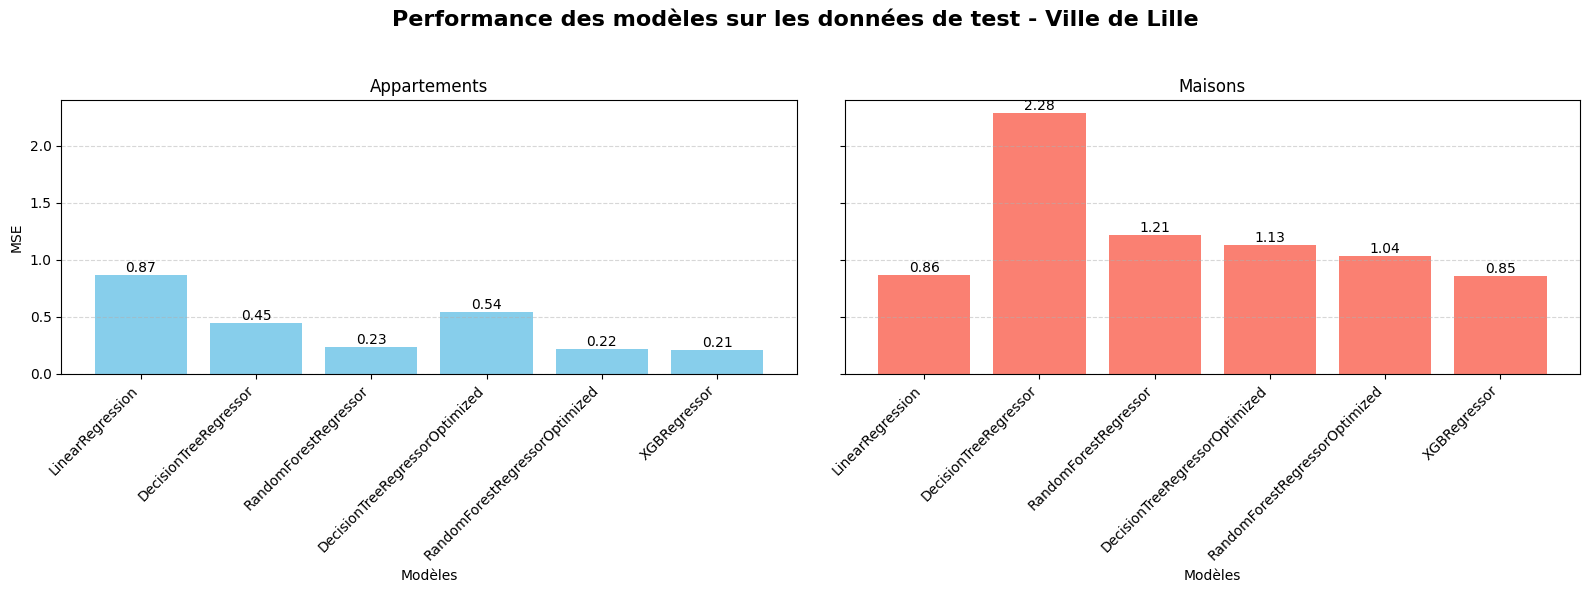

In [104]:
import matplotlib.pyplot as plt
import json

# ========================
# Donn√©es pour appartements
# ========================
mse_list_appart = []
mse_dict_appart = {}
min_mse_a = float('inf')
best_model_a = ""

for key in models_metrics_appart.keys():
    mse = models_metrics_appart[key][1]
    mse_list_appart.append(mse)
    mse_dict_appart[key] = mse
    if mse < min_mse_a:
        min_mse_a = mse
        best_model_a = key

labels_appart = list(models_metrics_appart.keys())

# =====================
# Donn√©es pour maisons
# =====================
mse_list_maison = []
mse_dict_maison = {}
min_mse_m = float('inf')
best_model_m = ""

for key in models_metrics_maison.keys():
    mse = models_metrics_maison[key][1]
    mse_list_maison.append(mse)
    mse_dict_maison[key] = mse
    if mse < min_mse_m:
        min_mse_m = mse
        best_model_m = key

labels_maison = list(models_metrics_maison.keys())

# =========================
# Sauvegarde dans un fichier
# =========================
mse_results_lille = {
    "appartements": mse_dict_appart,
    "maisons": mse_dict_maison
}

with open("mse_lille.json", "w") as f:
    json.dump(mse_results_lille, f, indent=4)

# =========================
# Affichage du meilleur mod√®le
# =========================
print(f"üè° Meilleur mod√®le Appartements : {best_model_a} (MSE = {min_mse_a:.2f})")
print(f"üè† Meilleur mod√®le Maisons      : {best_model_m} (MSE = {min_mse_m:.2f})")

# =========================
# Cr√©ation des subplots
# =========================
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle("Performance des mod√®les sur les donn√©es de test - Ville de Lille", fontsize=16, fontweight='bold')

# Subplot 1 ‚Äì Appartements
x_appart = range(len(labels_appart))
bars_appart = axes[0].bar(x_appart, mse_list_appart, color='skyblue')
axes[0].set_title("Appartements")
axes[0].set_ylabel("MSE")
axes[0].set_xlabel("Mod√®les")
axes[0].set_xticks(x_appart)
axes[0].set_xticklabels(labels_appart, rotation=45, ha='right')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
for bar in bars_appart:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Subplot 2 ‚Äì Maisons
x_maison = range(len(labels_maison))
bars_maison = axes[1].bar(x_maison, mse_list_maison, color='salmon')
axes[1].set_title("Maisons")
axes[1].set_xlabel("Mod√®les")
axes[1].set_xticks(x_maison)
axes[1].set_xticklabels(labels_maison, rotation=45, ha='right')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)
for bar in bars_maison:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Save models

In [92]:
import joblib

In [93]:
# Save model and scaler
# Cr√©er le dossier s'il n'existe pas
os.makedirs('../models', exist_ok=True)
joblib.dump({'model_a': models_metrics_appart[best_model_a][0], 
             'scaler_Xa': ScalerXa, 
             'scaler_ya':Scalerya,
             'model_m': models_metrics_maison[best_model_m][0], 
             'scaler_Xm': ScalerXm, 
             'scaler_ym':Scalerym}, 
            '../models/best_model_lille.pkl')

['../models/best_model_lille.pkl']

In [94]:
dict_model_appart={}
for model_name in models_metrics_appart:
    dict_model_appart[model_name] = models_metrics_appart[model_name][0]
    

In [95]:
dict_model_appart

{'LinearRegression': LinearRegression(),
 'DecisionTreeRegressor': DecisionTreeRegressor(),
 'RandomForestRegressor': RandomForestRegressor(),
 'DecisionTreeRegressorOptimized': DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42),
 'RandomForestRegressorOptimized': RandomForestRegressor(max_depth=10, random_state=42),
 'XGBRegressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              mono

In [96]:
joblib.dump(dict_model_appart,'../models/models_appart_lille.pkl')

['../models/models_appart_lille.pkl']

In [97]:
dict_model_maison={}
for model_name in models_metrics_maison:
    dict_model_maison[model_name] = models_metrics_maison[model_name][0]

In [98]:
dict_model_maison

{'LinearRegression': LinearRegression(),
 'DecisionTreeRegressor': DecisionTreeRegressor(),
 'RandomForestRegressor': RandomForestRegressor(),
 'DecisionTreeRegressorOptimized': DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42),
 'RandomForestRegressorOptimized': RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42),
 'XGBRegressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=na

In [99]:
joblib.dump(dict_model_maison, '../models/models_maison_lille.pkl')

['../models/models_maison_lille.pkl']